In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

EDA- Exploratory data analysis-first thing to do before doing anything. We will see some basic plotting techniques using this dataset.


IRIS dataset - It is a real world dataset of 3 flowers belonging to the IRIS family. Objective is to classify the flowers as belonging to one of the 3 classes, given 4 features.

let's try and find more information about this dataset
https://en.wikipedia.org/wiki/Iris_flower_data_set

In [4]:
iris_df = pd.read_csv('iris.csv',names=['sepal_length','sepal_width','petal_length','petal_width', 'species'])
iris_df.shape # to find out how my rows and columns the dataset have

(150, 5)

In [5]:
iris_df.head() # my data looks like this

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### So we know that a botanist would classify the plants on the basis of its features i.e sepal length,sepal width, petal length, petal width,
 Hence domain knowledge is very important for doing machine learning tasks.

In [6]:
iris_df['species'].value_counts() # so my dataset have 3 classes and have 50 datapoints for each of them.

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

so as this dataset contain equal number of datapoints in each class , such dataset is called balanced dataset.

### lets see how dataset looks by using some plotting techniques

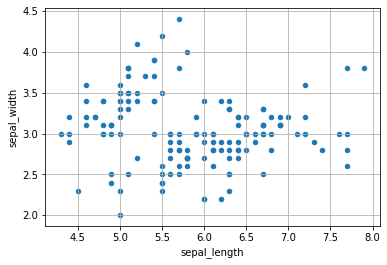

In [7]:
iris_df.plot(kind='scatter',x='sepal_length',y='sepal_width')
plt.grid()
plt.show()

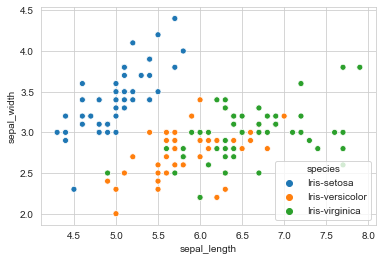

In [8]:
# scatter plot with different color-coding for each class 
sns.set_style('whitegrid')
sns.scatterplot(x=iris_df['sepal_length'],y=iris_df['sepal_width'],hue=iris_df['species'])


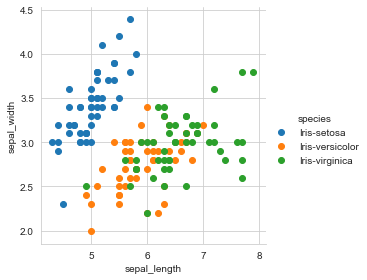

In [9]:
# Another way to plot this using seaborn is by using facetgrid
sns.set_style('whitegrid')
g = sns.FacetGrid(iris_df,hue='species',height=4)
g.map(plt.scatter,'sepal_length','sepal_width')
g.add_legend()
plt.show()

observations:

    1.Using 'sepal_length' and 'sepal_width' we can easily see that all datapoints of class 'setosa'are well seperated from the other 2 classes. 
    2. We can simply draw a line or write if-else to identify the setosa flowers.
    3. others classes are overlapped so we can't seperate them using these 2 features.

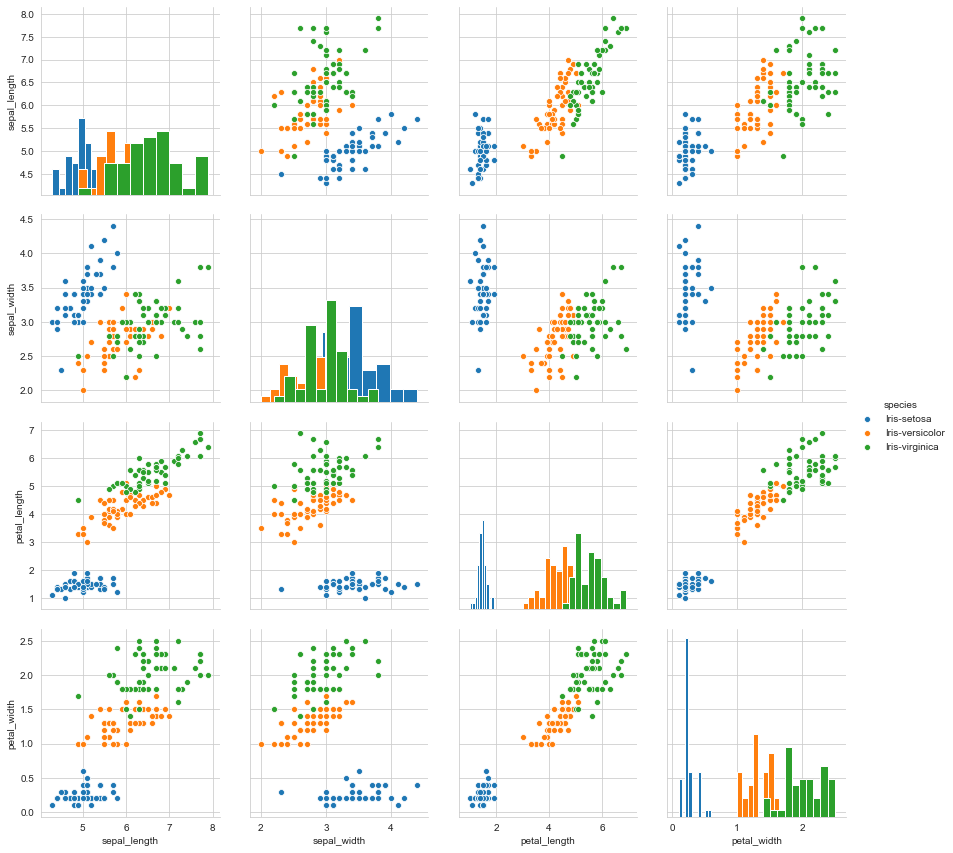

In [10]:
# pairplot gives scatter plot taking dimention or features 2 at a time
sns.set_style(style="whitegrid");
sns.pairplot(iris_df,hue='species',kind='scatter',diag_kind='hist',height=3)


Observation:
1. petal length and petal width are the most important features of iris dataset as they can seperate virginica and versicolor better than any other features.
2. They also do a very good job in seperating the setosa flowers as it is linearly seperable.
3. there is no overlap between setosa and other two types of flower, where virginica and versicolor have some overlap.

### What is 1D plot(Histogram, PDF, CDF)(Univariate Analysis)

In [11]:
setosa = iris_df[iris_df['species']=='Iris-setosa']
virginica = iris_df[iris_df['species']=='Iris-virginica']
versicolor = iris_df[iris_df['species']=='Iris-versicolor']

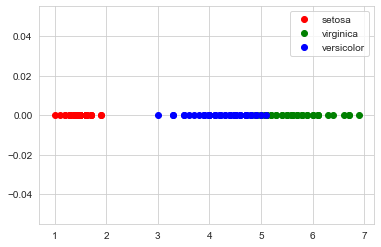

In [12]:
l1, = plt.plot(setosa['petal_length'], np.zeros_like(setosa['petal_length']),'ro',label='setosa')
l2, =plt.plot(virginica['petal_length'], np.zeros_like(virginica['petal_length']),'go',label='virginica')
l3, = plt.plot(versicolor['petal_length'], np.zeros_like(versicolor['petal_length']),'bo',label='versicolor')
# labels = ['setosa','virginica','versicolor']
plt.legend(handles=[l1,l2,l3])
plt.show()

1-D scatter plots are difficult to read as we can't determine the number of points between intervals i.e desity.

Hence one modification that we can do is by taking frequency of points using histogram.


### Histograms(Univariate Analysis)

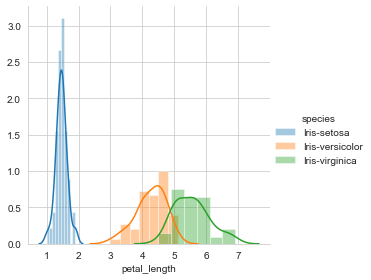

In [13]:
sns.set_style('whitegrid')
sns.FacetGrid(iris_df,hue='species',height=4).map(sns.distplot,'petal_length').add_legend()
plt.show()

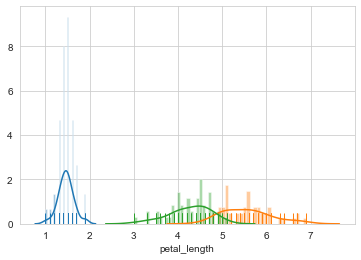

In [14]:
# to make graph similar to above without using multiplot(Facetgrid)
setosa = iris_df[iris_df['species']=='Iris-setosa']
virginica = iris_df[iris_df['species']=='Iris-virginica']
versicolor = iris_df[iris_df['species']=='Iris-versicolor']

sns.distplot(setosa['petal_length'],bins=30,rug=True)
sns.distplot(virginica['petal_length'],bins=30,rug=True)
sns.distplot(versicolor['petal_length'],bins=30,rug=True)
plt.show()

Observation:
    1. height here represent the how often we find this petal_length
    2. smoothed lines are PDF(probability density Func.). They are basically smoothed histograms, they are smoothed using kernel density estimators.
    3. By using this histogram we can still seperate Setosa flowers. hence, it can be easily identified and seperated.
    4. PDF's of Virginica and Versicolor are overlapping,hence can be seperated perfectly.
    5. At the Overlapped area we should see which class has more density.
    
Disadvantage:
    can we say what percentage of versicolor have petal length greater than 4.5cm.
    

In this we will analyse each of the variable separately. points to remember about PDF is that the best plot is the one which has no overlap or minimum overlap, and further the plots the better plot it is. Below the plot with respect to each variable is given. If we have to choose any one of the feature we should choose petal_length and it is separating setosa perfectly,whereas petal_width also does the fairly good job but since there is a small intersection between setosa and versicolor the other feature is much better. BUt, incase we need 2 features we must see the pairplot and decide.

Sepal length and sepal width does a very poor job and should not be used here as there is a large intersection between the plot's area.

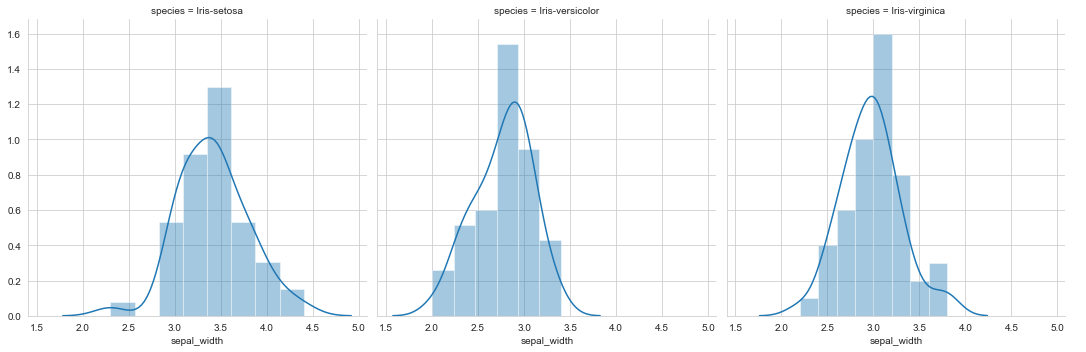

In [15]:
sns.FacetGrid(iris_df,col = 'species',height=5).map(sns.distplot,'sepal_width').add_legend() # ploting seperately for class.

plt.show()

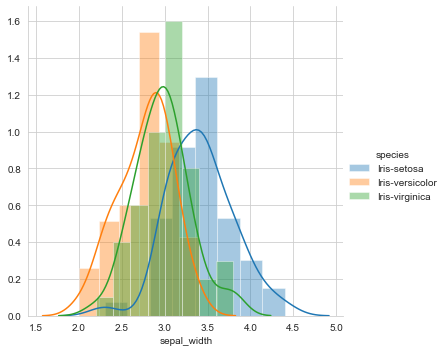

In [16]:
sns.FacetGrid(iris_df,hue = 'species',height=5).map(sns.distplot,'sepal_width').add_legend() # ploting together

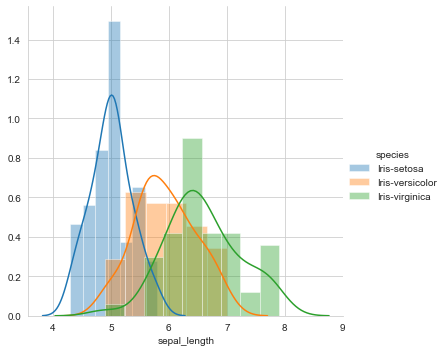

In [17]:
sns.FacetGrid(iris_df,hue = 'species',height=5).map(sns.distplot,'sepal_length').add_legend() # ploting together

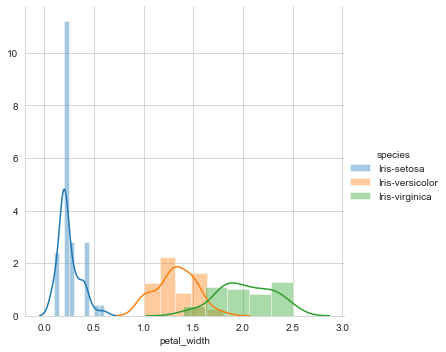

In [18]:
sns.FacetGrid(iris_df,hue = 'species',height=5).map(sns.distplot,'petal_width').add_legend() # ploting together
plt.show()


### Cumulative density function (CDF)

PDF tells us that how many points have X petal_length.
whereas, CDF tells us how that 80%(or y probability) of setosa flowers have less than x petal_length.

here X is petal_length and Y is probability.
So, CDF is area under the PDF curve till the point and if we differentiate CDF we get PDF.

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]
[0.02 0.04 0.08 0.22 0.46 0.74 0.88 0.96 0.96 1.  ]


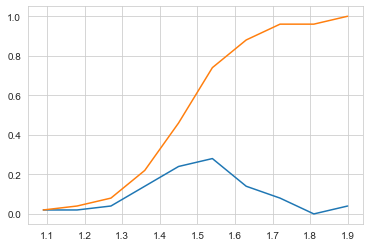

In [19]:
count,binedges = np.histogram(setosa['petal_length'],bins=10,density=True)
pdf = count/(sum(count))
print(pdf)
print(binedges)

cdf = np.cumsum(pdf)
print(cdf)

plt.plot(binedges[1:],pdf)
plt.plot(binedges[1:],cdf)

In [20]:
binedges

array([1.  , 1.09, 1.18, 1.27, 1.36, 1.45, 1.54, 1.63, 1.72, 1.81, 1.9 ])

In [21]:
len(binedges)

11

The Blue line is PDF and Orange Line is CDF of petal_length, X axis have petal_length and Y axis have Probability for setosa flowers.
PDF : Represents how many points are between the interval.
CDF: Tells us at x=1.6 corresponding value is 0.8 , means there are 80% setosa flower that have petal_length less than equal to 1.6.

Basially CDF is area under the PDF curve till a point. Using calculas it can be computed using Integration.

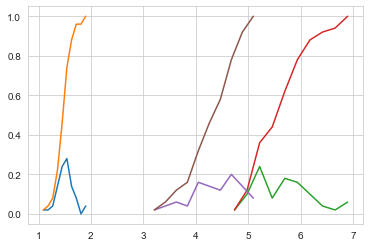

In [22]:
count,binedges = np.histogram(setosa['petal_length'],bins=10,density=True)
pdf = count/(sum(count))
cdf = np.cumsum(pdf)
plt.plot(binedges[1:],pdf)
plt.plot(binedges[1:],cdf)

count,binedges = np.histogram(virginica['petal_length'],bins=10,density=True)
pdf = count/(sum(count))
cdf = np.cumsum(pdf)
plt.plot(binedges[1:],pdf)
plt.plot(binedges[1:],cdf)

count,binedges = np.histogram(versicolor['petal_length'],bins=10,density=True)
pdf = count/(sum(count))
cdf = np.cumsum(pdf)
plt.plot(binedges[1:],pdf)
plt.plot(binedges[1:],cdf)


setosa petal_length is clearly seperable i.e if petal_length <2 we can classify it as setosa.
but virginica and versicolor have intersecting PDF's, let's say we put a threshold at 5,
So at 5 CDF of versicolor is 0.95 and viginica is 0.1. So if we consider a petal length less than 5, then we classify it as virginica. if we do so then we will be correct 95% of the time.


## Mean, Variance and Std-deviation

In [23]:
# Means of petal length of 3 classes of flower.
print("Means:")
print(np.mean(setosa['petal_length']))
print(round(np.mean(virginica['petal_length']),2))
print(np.mean(versicolor['petal_length']))

Means:
1.464
5.55
4.26


Mean tells us about the central tendency of the data, the problem with mean is that it can be corrupted becuase of the noisy data or data having outliers.

Variance is a measure of spread for these data.
central tendency and spread gives me more intution about how the data like if spread is less, then I can say most of my datapoints lie in a particular range.

This spread can be calculated using standard deviation

relation b/w them is stand dev. = (var)^1\2
standard deviation is what is the standard deviation of my points from my mean. 


In [24]:
print("Standard Deviation")
print(np.std(setosa['petal_length']))
print(np.std(virginica['petal_length']))
print(np.std(versicolor['petal_length']))

Standard Deviation
0.17176728442867112
0.546347874526844
0.4651881339845203


Observations:
    1. petal_length of setosa flower is very thinly spread i.e. they are concentrated in a very small range.
    2. Whereas,petal length of Versicolor and virginica are widely spread.
    3. Taking mean and std dev into consideration I can conclude range in which my most of my point lies for eg: mean-std_dev<=mean<=mean+std_dev.
    problem with standard deviation/Variance is that just like mean, one outlier can corrupt my whole data.

To solve this problem of outlier in the data we gave Median,Mode as an alternate to mean which gives the central tendency of data.

## Median

In [25]:
print("\nMedians:")
print(np.median(setosa['petal_length'])) 
print(np.median(np.append(setosa['petal_length'],50)))# median with outlier

print(np.median(virginica['petal_length']))
print(np.median(np.append(virginica['petal_length'],50)))# median with outlier

print(np.median(versicolor['petal_length']))
print(np.median(np.append(versicolor['petal_length'],50)))# median with outlier


Medians:
1.5
1.5
5.55
5.6
4.35
4.4


these values are similar to mean value, but even with small numbers of outliers its gives similar output to as it would give when there is no outlier.

## Quantiles and Percentiles

Percentile calculation is done --
Suppose we have array arr[100], sort this array in increasing order.
So now 10th percentile means than 90% points are greater than this value whereas 10% are less than this.

-- Median is simply 50th percentile value.

-- Quantile is 25th,50th,75th,100th percentile.


In [30]:
print("Quantiles")
print(np.percentile(setosa['petal_length'],np.arange(0,100,25)))
print(np.percentile(virginica['petal_length'],np.arange(0,100,25)))
print(np.percentile(versicolor['petal_length'],np.arange(0,100,25)))

print('\n90th Percentile')
print(np.percentile(setosa['petal_length'],90))
print(np.percentile(virginica['petal_length'],90))
print(np.percentile(versicolor['petal_length'],90))


Quantiles
[1.    1.4   1.5   1.575]
[4.5   5.1   5.55  5.875]
[3.   4.   4.35 4.6 ]

90th Percentile
1.7
6.3100000000000005
4.8


Median absolute deviation
= median(|xi-median|)i=0->n

this is also used to calculate that how far are my points from my central tendency(here represented by median)


## IQR(Inter Quartile range)

= 75 percentile value - 25th percentile value

## BOX Whiskers plot

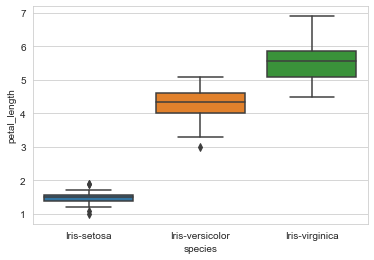

In [37]:
sns.boxplot(x=iris_df['species'],y=iris_df['petal_length'],data=iris_df )
# sns.boxplot(x='species',y='petal_length',data=iris_df) # can also be used like this
# The box Gives us insights about the IQR(the horizontal lines indicates 25,50th and75th percentiles)

## Violin Plots 

A voilin plot combines the benefits of previous 2 plots and simplifies them.The central black line is actually the boxplot whith white dot as 50th percentile. The curve on the sides are the PDF on the sides.

Denser region in data are fatter, the sparser region are thinner in this plot

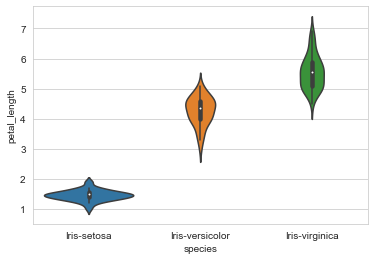

In [38]:
sns.violinplot(x='species',y='petal_length',data=iris_df)

In [ ]:
# Univariate- PDF,CDF, Boxplots,voilin
# Bivariate- pairplots, scatterplots
# multivariate- 3d scatterplots, 


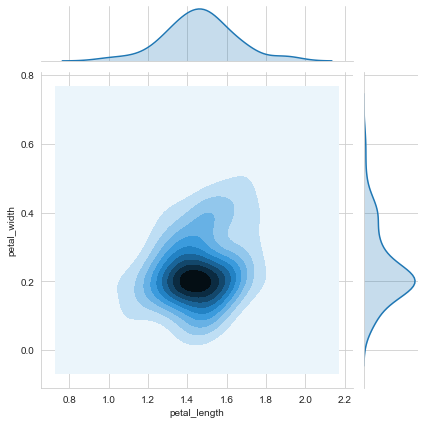

In [42]:
# Multivariate- 2D density plots, contour plots
sns.jointplot(x='petal_length',y='petal_width',data=setosa,kind="kde")
# kind : { "scatter" | "reg" | "resid" | "kde" | "hex" 